# Static Word Embedding


In [10]:
import numpy as np
import pandas as pd
import os
import time
import spacy 
from spacy import displacy

import gensim
# Read the input DataFrame
df = pd.read_csv('../../../data/processed/cleaned.csv')

# Create the output folder if it doesn't exist
output_folder = "../../../output/embedding_static"
os.makedirs(output_folder, exist_ok=True)

start_time = time.time()

# Static Embedding based on Word2Vec Pre-Trained model

In [6]:
import numpy as np
import pandas as pd
import os
import time
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')


# Load the input DataFrame
df = pd.read_csv('../../../data/processed/cleaned.csv')

# Tokenize the text data and filter out stopwords
stop_words = set(stopwords.words('english'))

sentences = []
for text in df['text']: 
    words = [word.lower() for word in word_tokenize(text) if word.isalpha() and word.lower() not in stop_words]
    sentences.append(words)

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the trained model
output_folder = "../../../output/embedding_static"
os.makedirs(output_folder, exist_ok=True)
model_path = os.path.join(output_folder, "word2vec_model.bin")
model.save(model_path)

# Convert the Word2Vec model to GloVe format
word_vectors = model.wv
word_vectors.save_word2vec_format(os.path.join(output_folder, 'glove_vectors.txt'), binary=False)

print("GloVe word embeddings generated and saved successfully.")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jihyeonbae/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jihyeonbae/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


GloVe word embeddings generated and saved successfully.


# Static Embedding by GloVe pre-trained model

In [7]:
import numpy as np
import gensim.downloader as api
import pandas as pd
import os

# Load embeddings
glove = api.load("glove-wiki-gigaword-100")

# Load the input DataFrame
df = pd.read_csv('../../../data/processed/cleaned.csv')  # adjust the path as necessary

# Create the output folder if it doesn't exist
output_folder = "../../../output/embedding_glove"
os.makedirs(output_folder, exist_ok=True)

# Load sentences
sentences = df['text'].tolist()

# Tokenize and filter sentences
sentences = [[word for word in sentence.lower().split() if word in glove] for sentence in sentences]

# Compute sentence embeddings
embeddings = []
for sentence in sentences:
    emb = np.mean([glove[word] for word in sentence], axis=0)
    embeddings.append(emb)

# Export embeddings
np.savetxt(os.path.join(output_folder, "static_embedding.csv"), embeddings, delimiter=",")


In [9]:
import numpy as np
import pandas as pd
import os
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity

# Load GloVe embeddings
glove = api.load("glove-wiki-gigaword-100")

# Load the input DataFrame
df = pd.read_csv('../../../data/processed/cleaned.csv')  # adjust the path as necessary

# Check if keywords are in the vocabulary
keyword1 = "sovereignty"
keyword2 = "territory"

if keyword1 in glove.key_to_index and keyword2 in glove.key_to_index:
    # Get embeddings for the keywords
    embedding1 = glove[keyword1].reshape(1, -1)
    embedding2 = glove[keyword2].reshape(1, -1)

    # Compute cosine similarity between embeddings for each row
    similarities = []
    for text in df['text']:
        words = text.lower().split()
        emb = np.mean([glove[word] for word in words if word in glove.key_to_index], axis=0)
        emb = emb.reshape(1, -1)
        similarity = cosine_similarity(embedding1, emb)[0][0]
        similarities.append(similarity)

    # Add similarities to DataFrame
    df['similarity_to_sovereignty'] = similarities

    # Save the DataFrame
    output_folder = "../../../output/similarity_over_time"
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, "similarity_to_sovereignty.csv")
    df.to_csv(output_path, index=False)
    
    print(f"Similarity between '{keyword1}' and '{keyword2}' computed over time and saved successfully.")
else:
    print("One or both of the keywords are not in the vocabulary.")


Similarity between 'sovereignty' and 'territory' computed over time and saved successfully.


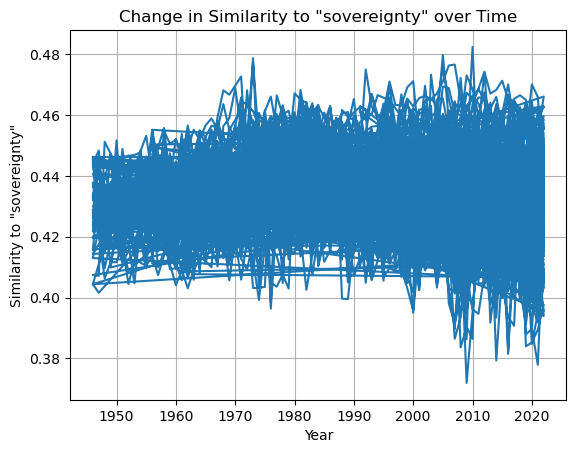

Visualization completed successfully.


In [10]:
import numpy as np
import pandas as pd
import os
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load GloVe embeddings
glove = api.load("glove-wiki-gigaword-100")

# Load the input DataFrame
df = pd.read_csv('../../../data/processed/cleaned.csv')  # adjust the path as necessary

# Check if keywords are in the vocabulary
keyword1 = "sovereignty"
keyword2 = "territory"

if keyword1 in glove.key_to_index and keyword2 in glove.key_to_index:
    # Get embeddings for the keywords
    embedding1 = glove[keyword1].reshape(1, -1)
    embedding2 = glove[keyword2].reshape(1, -1)

    # Compute cosine similarity between embeddings for each row
    similarities = []
    for text in df['text']:
        words = text.lower().split()
        emb = np.mean([glove[word] for word in words if word in glove.key_to_index], axis=0)
        emb = emb.reshape(1, -1)
        similarity = cosine_similarity(embedding1, emb)[0][0]
        similarities.append(similarity)

    # Add similarities to DataFrame
    df['similarity_to_sovereignty'] = similarities

    # Visualize similarity over time
    plt.plot(df['year'], df['similarity_to_sovereignty'])
    plt.xlabel('Year')
    plt.ylabel('Similarity to "sovereignty"')
    plt.title('Change in Similarity to "sovereignty" over Time')
    plt.grid(True)
    plt.show()
    
    print("Visualization completed successfully.")
else:
    print("One or both of the keywords are not in the vocabulary.")


## Below code facets around 6 regime types. 

In [12]:
import numpy as np
import pandas as pd
import os
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load GloVe embeddings
glove = api.load("glove-wiki-gigaword-100")

# Load the input DataFrame
df = pd.read_csv('../../../data/processed/meta.csv')  # adjust the path as necessary

# Check if keywords are in the vocabulary
keyword1 = "sovereignty"
keyword2 = "territory"

if keyword1 in glove.key_to_index and keyword2 in glove.key_to_index:
    # Specify regime types
    regime_types = {
        0: 'Parliamentary democracy',
        1: 'Mixed (semi-presidential) democracy',
        2: 'Presidential democracy',
        3: 'Civilian dictatorship',
        4: 'Military dictatorship',
        5: 'Royal dictatorship'
    }

    # Compute similarity for each regime type
    for regime_code, regime_name in regime_types.items():
        regime_df = df[df['fd_regime'] == regime_code]
        similarities = []
        for text in regime_df['text']:
            words = text.lower().split()
            emb = np.mean([glove[word] for word in words if word in glove.key_to_index], axis=0)
            emb = emb.reshape(1, -1)
            similarity = cosine_similarity(glove[keyword1].reshape(1, -1), emb)[0][0]
            similarities.append(similarity)

        # Plot similarity over time for each regime type
        plt.figure(figsize=(10, 5))
        plt.plot(regime_df['year'], similarities, label=regime_name)
        plt.xlabel('Year')
        plt.ylabel('Similarity to "sovereignty"')
        plt.title(f'Change in Similarity to "sovereignty" over Time ({regime_name})')
        plt.grid(True)
        plt.legend()
        plt.show()

    print("Visualizations completed successfully.")
else:
    print("One or both of the keywords are not in the vocabulary.")


KeyError: 'fd_regime'

## I also use vdem's polyarchy score as a category. 

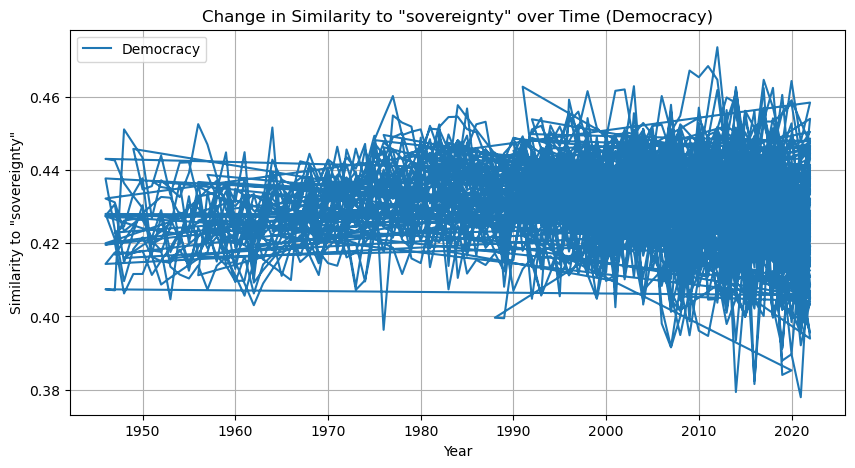

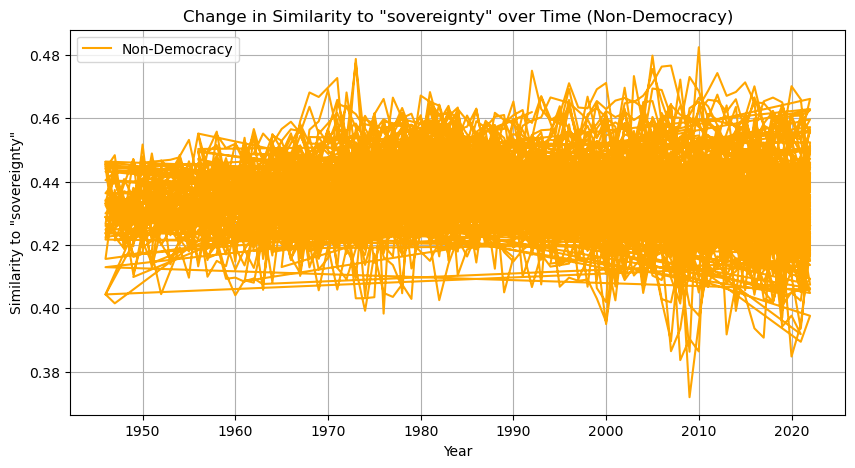

Visualizations completed successfully.


In [13]:
import numpy as np
import pandas as pd
import os
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load GloVe embeddings
glove = api.load("glove-wiki-gigaword-100")

# Load the input DataFrame
df = pd.read_csv('../../../data/processed/meta.csv')  # adjust the path as necessary

# Check if keywords are in the vocabulary
keyword1 = "sovereignty"
keyword2 = "territory"

if keyword1 in glove.key_to_index and keyword2 in glove.key_to_index:
    # Generate new variable based on v2x_polyarchy
    df['regime_type'] = np.where(df['v2x_polyarchy'] >= 0.5, 'Democracy', 'Non-Democracy')

    # Filter DataFrame by regime type
    democracy_df = df[df['regime_type'] == 'Democracy']
    non_democracy_df = df[df['regime_type'] == 'Non-Democracy']

    # Compute similarity for democracy regime
    similarities_democracy = []
    for text in democracy_df['text']:
        words = text.lower().split()
        emb = np.mean([glove[word] for word in words if word in glove.key_to_index], axis=0)
        emb = emb.reshape(1, -1)
        similarity = cosine_similarity(glove[keyword1].reshape(1, -1), emb)[0][0]
        similarities_democracy.append(similarity)

    # Compute similarity for non-democracy regime
    similarities_non_democracy = []
    for text in non_democracy_df['text']:
        words = text.lower().split()
        emb = np.mean([glove[word] for word in words if word in glove.key_to_index], axis=0)
        emb = emb.reshape(1, -1)
        similarity = cosine_similarity(glove[keyword1].reshape(1, -1), emb)[0][0]
        similarities_non_democracy.append(similarity)

    # Plot similarity over time for democracy regime
    plt.figure(figsize=(10, 5))
    plt.plot(democracy_df['year'], similarities_democracy, label='Democracy')
    plt.xlabel('Year')
    plt.ylabel('Similarity to "sovereignty"')
    plt.title('Change in Similarity to "sovereignty" over Time (Democracy)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot similarity over time for non-democracy regime
    plt.figure(figsize=(10, 5))
    plt.plot(non_democracy_df['year'], similarities_non_democracy, label='Non-Democracy', color='orange')
    plt.xlabel('Year')
    plt.ylabel('Similarity to "sovereignty"')
    plt.title('Change in Similarity to "sovereignty" over Time (Non-Democracy)')
    plt.grid(True)
    plt.legend()
    plt.show()

    print("Visualizations completed successfully.")
else:
    print("One or both of the keywords are not in the vocabulary.")
